**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Import Data**

In [3]:
df = pd.read_csv("/content/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Data Processing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe().style.background_gradient(cmap = 'YlGnBu')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.shape

(6435, 8)

**The data is analysed for day, month, and year**

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


**Rechecking the shape**

In [10]:
df.shape

(6435, 11)

In [11]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Weekly_Sales: 6435
Holiday_Flag: 2
Temperature: 3528
Fuel_Price: 892
CPI: 2145
Unemployment: 349
Day: 7
Week: 52
Month: 12
Year: 3


**Exploratory Data Analysis**

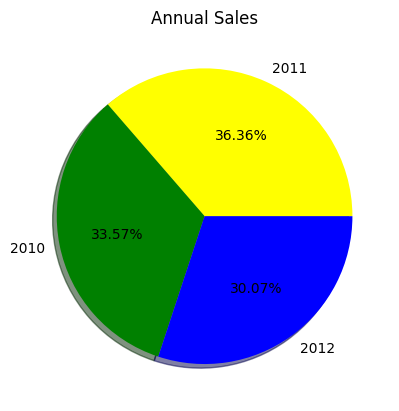

In [12]:
plt.pie(df['Year'].value_counts().values,labels =df['Year'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['yellow','green',"blue"])
plt.title('Annual Sales')
plt.show()

In [13]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Week', 'Month', 'Year'],
      dtype='object')

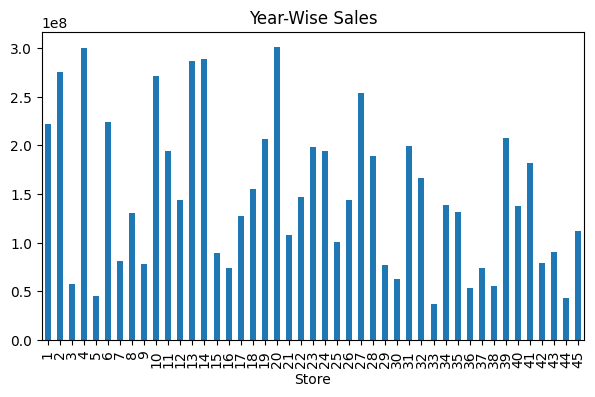

In [14]:
plt.figure(figsize=(7,4))

df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Year-Wise Sales')

plt.show()

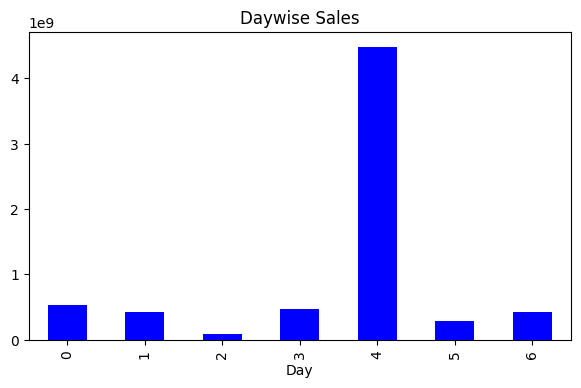

In [15]:
plt.figure(figsize=(7,4))

df.groupby(['Day'])['Weekly_Sales'].sum().plot(kind='bar',color='blue')
plt.title('Daywise Sales')

plt.show()

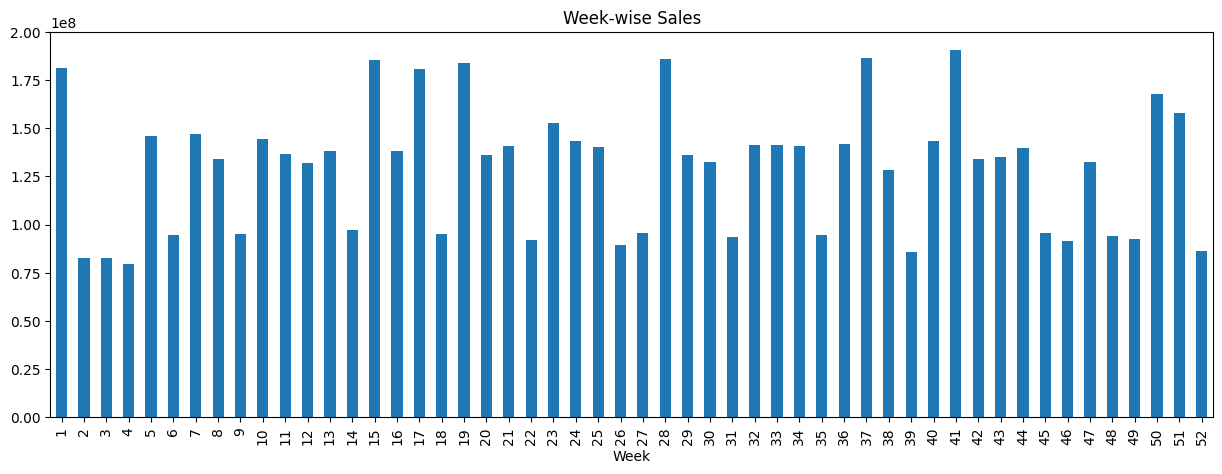

In [16]:
plt.figure(figsize=(15,5))

df.groupby(['Week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Week-wise Sales')

plt.show()

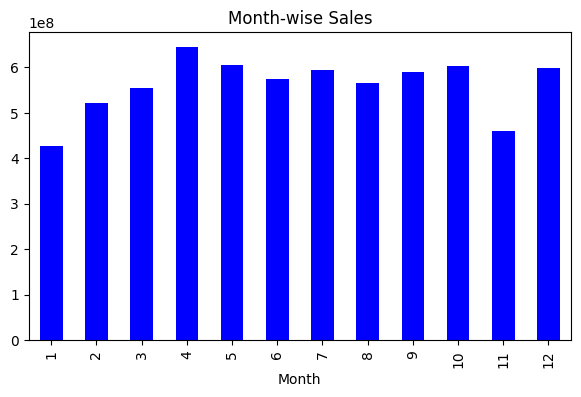

In [17]:
plt.figure(figsize=(7,4))

df.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar',color='blue')
plt.title('Month-wise Sales')

plt.show()

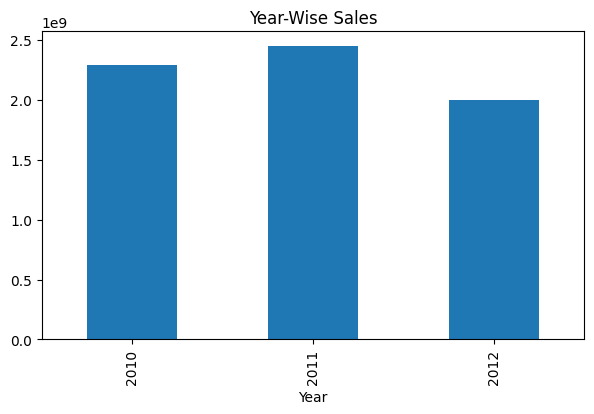

In [18]:
plt.figure(figsize=(7,4))

df.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Year-Wise Sales')

plt.show()

**Checking for outliers**

Outliers are data points that significantly deviate from the overall pattern of the data. In a box plot, outliers are represented by individual points outside the whiskers of the box, which can indicate values that are unusually high or low compared to the rest of the data.

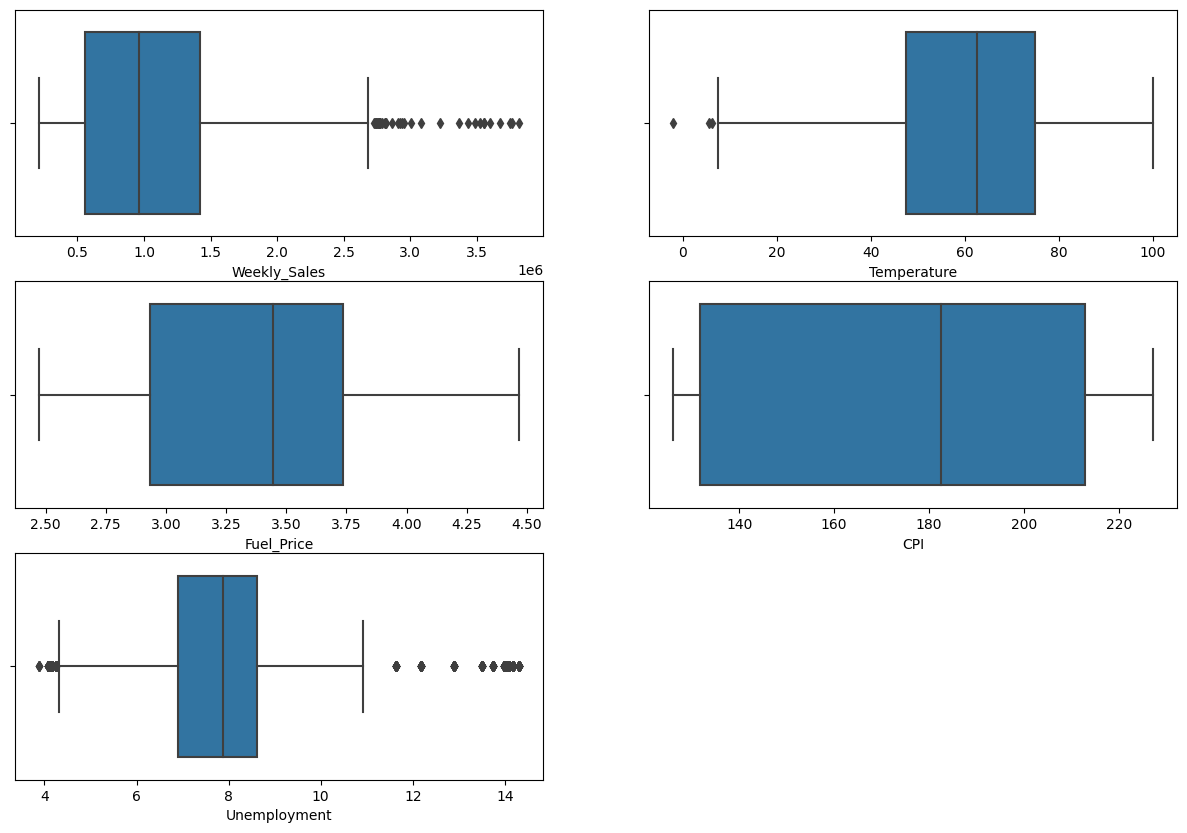

In [19]:
n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [20]:
l = ["Weekly_Sales","Temperature","Unemployment"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

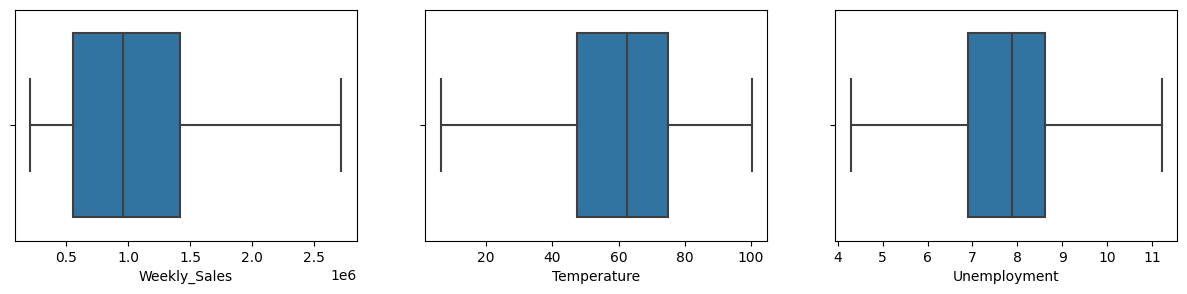

In [21]:
n = 1
cols =["Weekly_Sales","Temperature","Unemployment"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [22]:
df2 = df.copy()
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [23]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df2['Day'] = df2['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df2['Month']= df2['Month'].map(months)
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,17,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,48,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,7,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,8,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,18,May,2010


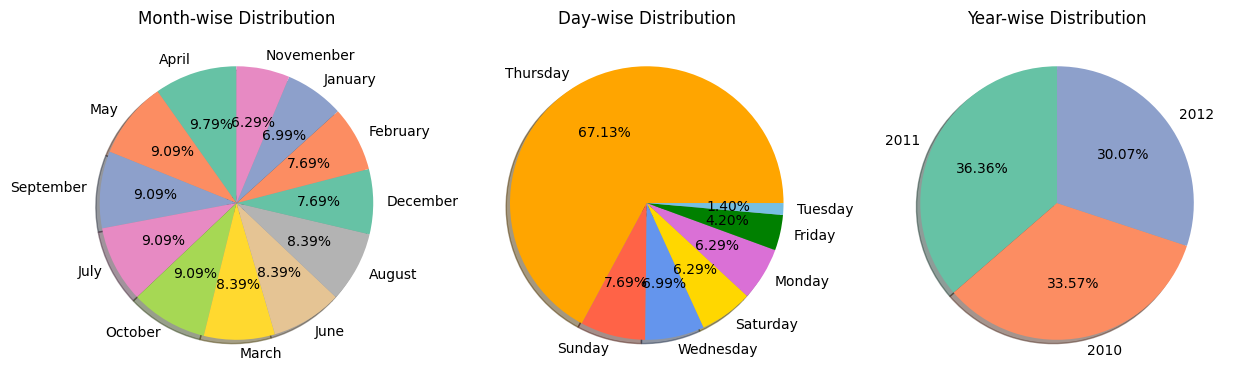

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 2)
plt.pie(df2['Day'].value_counts().values, labels =df2['Day'].value_counts().index,
autopct = '%1.2f%%', shadow=True,colors=["Orange",'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',"#77BFE2"]) 
plt.title('Day-wise Distribution')
plt.grid()

plt.subplot(1, 3, 1)
plt.pie(df2['Month'].value_counts().values, labels =df2['Month'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'))
plt.title('Month-wise Distribution')
plt.grid()

plt.subplot(1, 3, 3)
df3 = df2.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df2['Year'].value_counts().values, labels =df2['Year'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'),labeldistance=1.1)  
plt.title('Year-wise Distribution')
plt.grid()


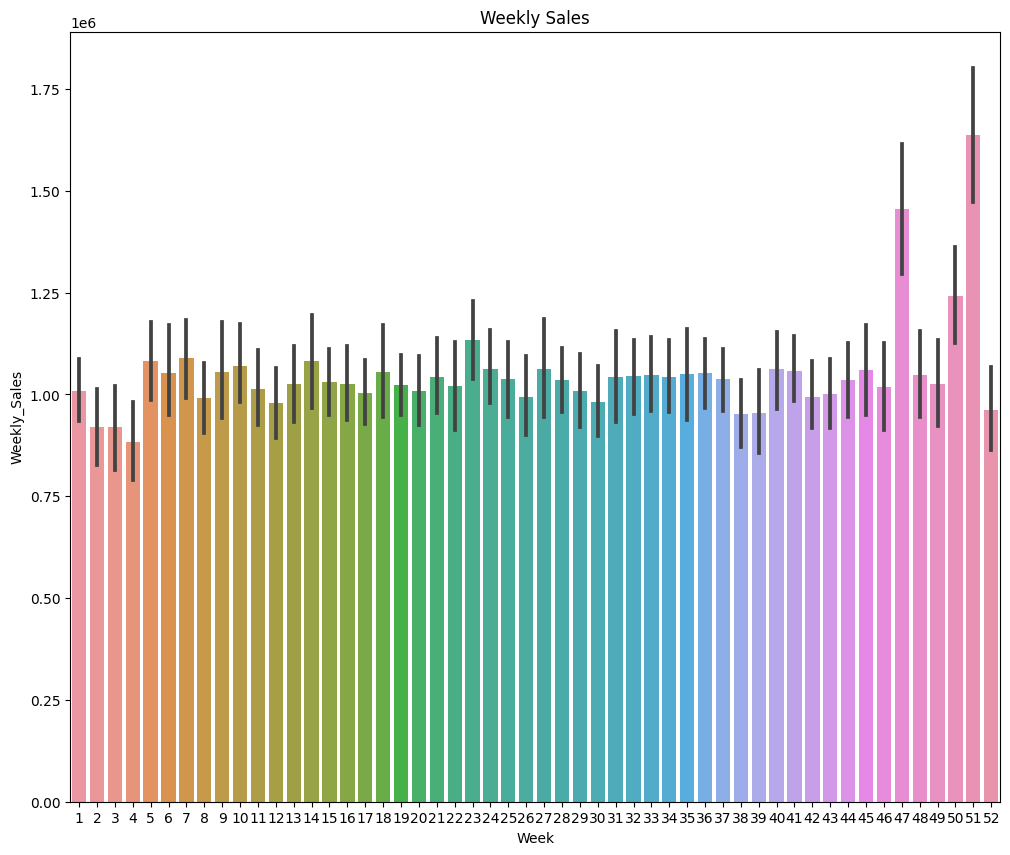

In [25]:
plt.figure(figsize=(12,10))

sns.barplot(df2,x= 'Week',y='Weekly_Sales')
plt.title('Weekly Sales')

plt.show()

<Figure size 1500x1200 with 0 Axes>

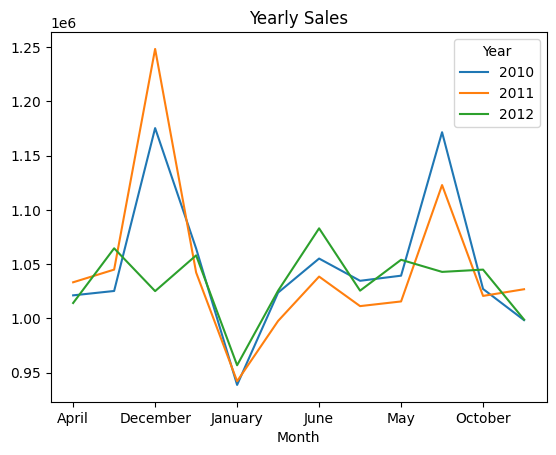

In [26]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df2, index = "Month", columns = "Year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

In [27]:
print('Minimum Sales in the Walmart: ',df2.groupby('Store')['Weekly_Sales'].sum().min())
print('Maximum Sales in the Walmart: ',df2.groupby('Store')['Weekly_Sales'].sum().max())

Minimum Sales in the Walmart:  37160221.96
Maximum Sales in the Walmart:  299066335.2575


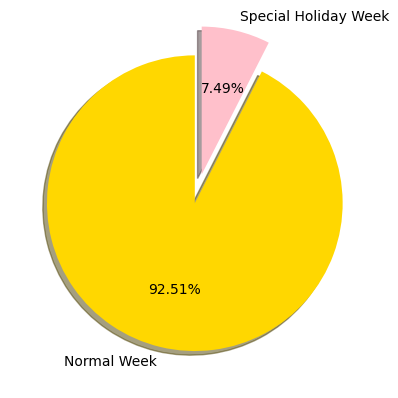

In [28]:
df3 = df2.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df3['Weekly_Sales'],labels= ['Normal Week','Special Holiday Week'],
autopct='%1.2f%%',startangle=90,explode=[0,0.2],shadow=True,colors=['gold','pink'])
plt.show()

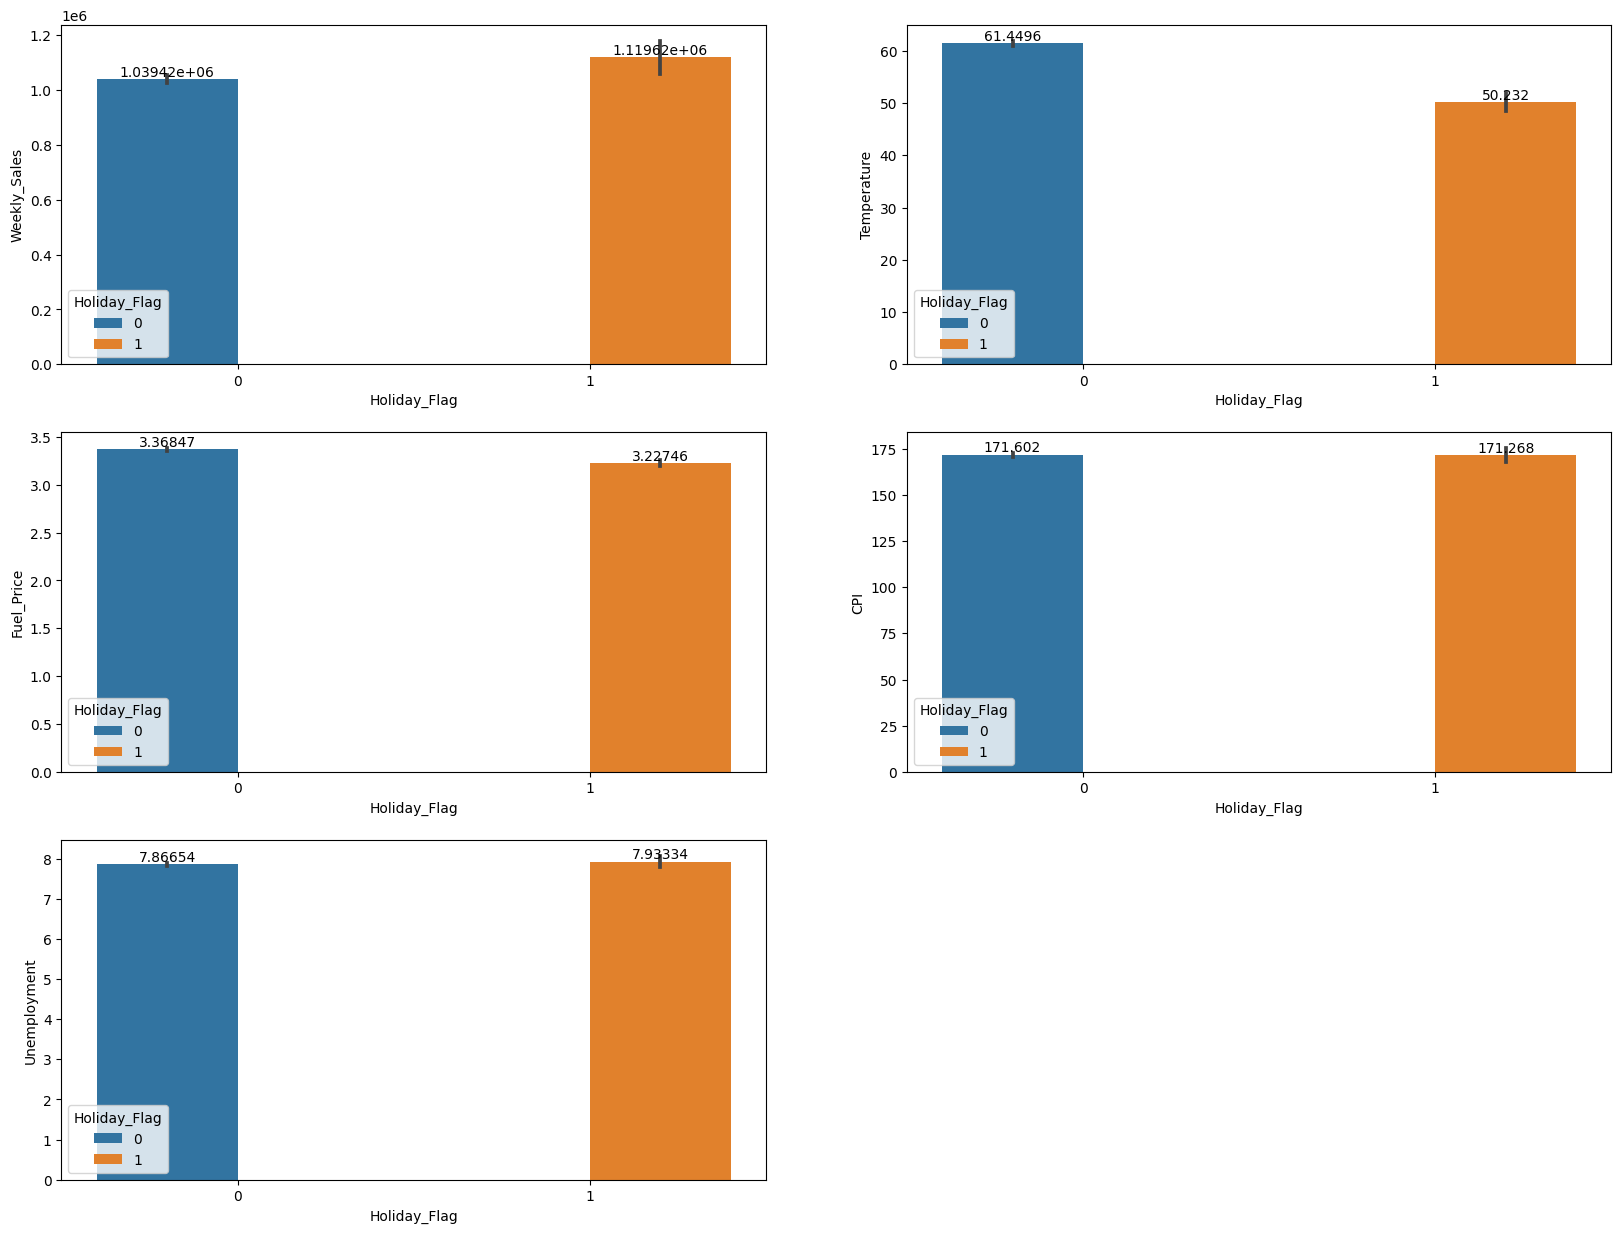

In [29]:
from numpy import mean
t = 1
plt.figure(figsize=(20,15))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if t<=5:
            plt.subplot(3,2,t)
            ax = sns.barplot(data = df2 , x = "Holiday_Flag" ,y = i  , hue = df.Holiday_Flag ,estimator=mean);
            t+=1
            
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)

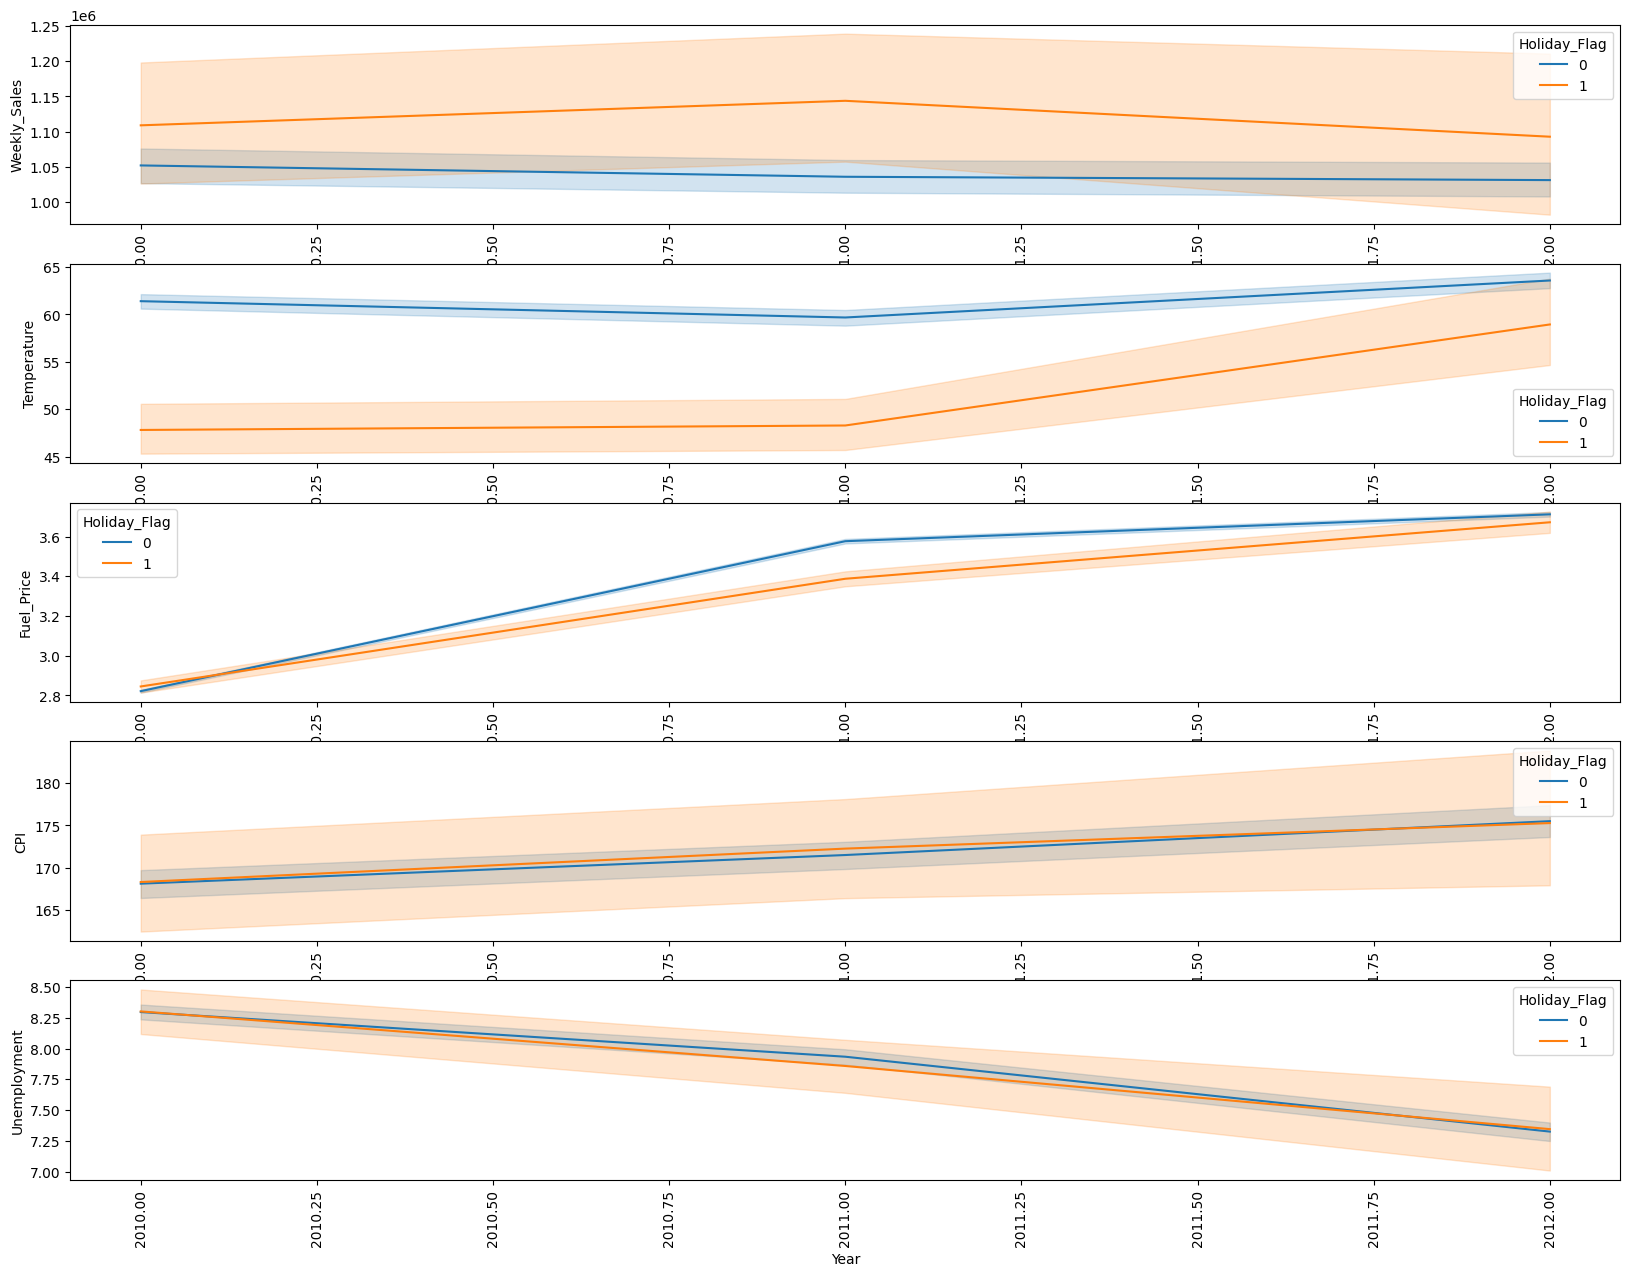

In [30]:
n = 1
plt.figure(figsize=(20,15))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if n<=5:
            plt.subplot(5,1,n)
            ax = sns.lineplot(data = df2 , x = "Year" ,y = i  , hue = df.Holiday_Flag );
            plt.xticks(rotation = 90)
            n+=1

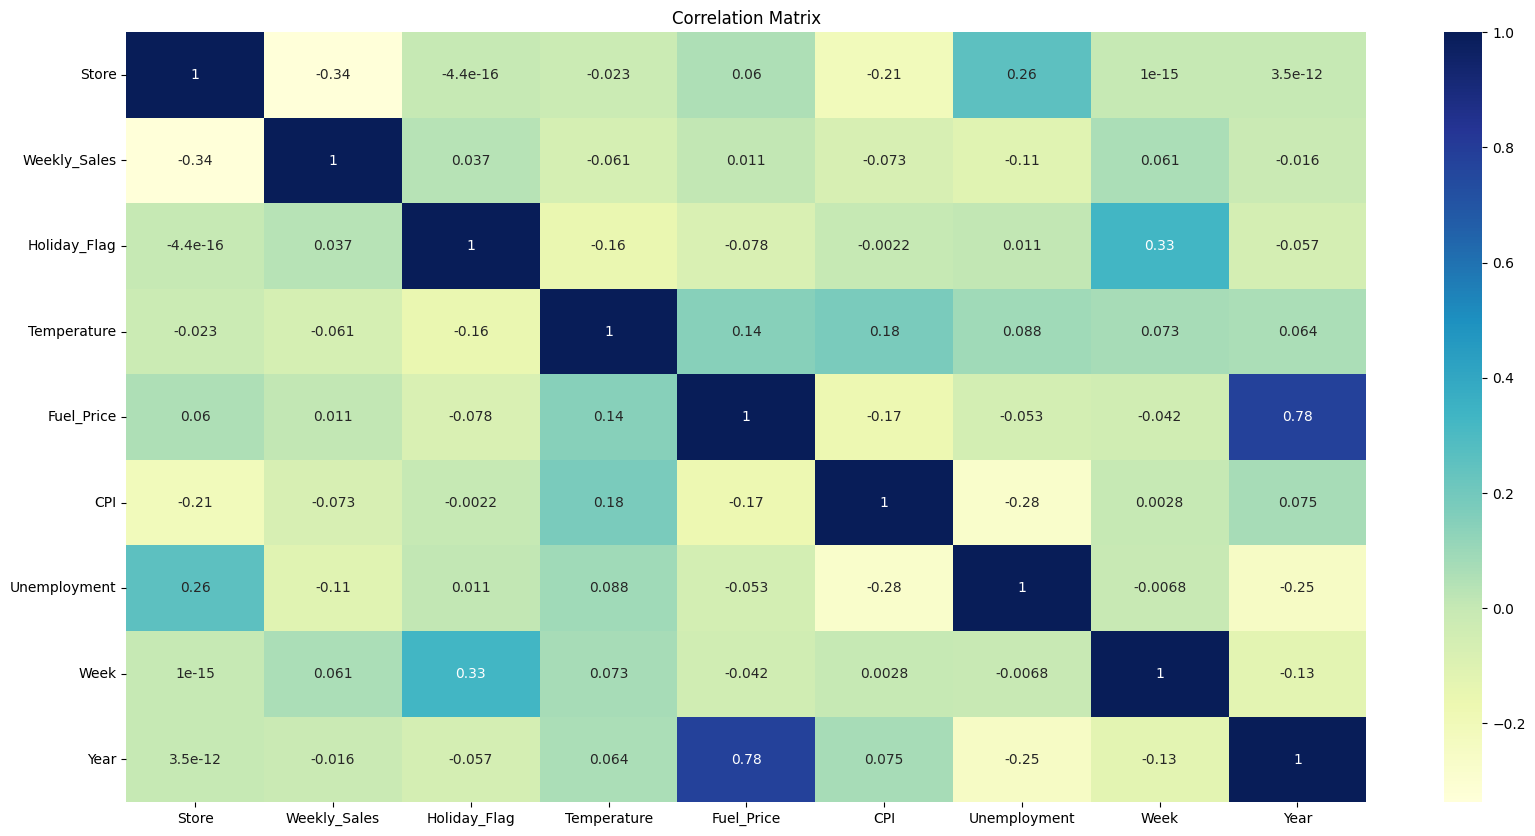

In [31]:
plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(),annot=True,cmap ="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

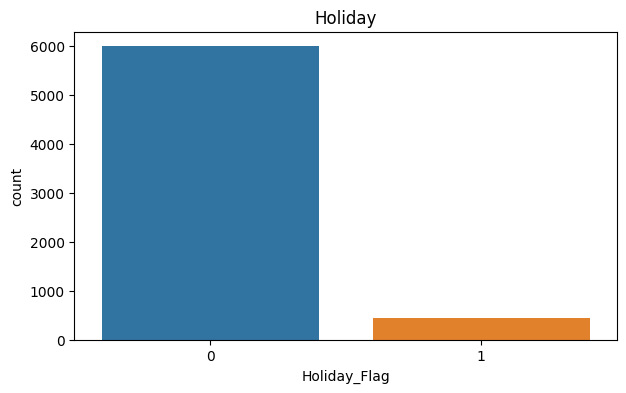

In [32]:
plt.figure(figsize=(7,4))

sns.countplot(x= df2.Holiday_Flag)
plt.title('Holiday')

plt.show()

In [33]:
df2.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

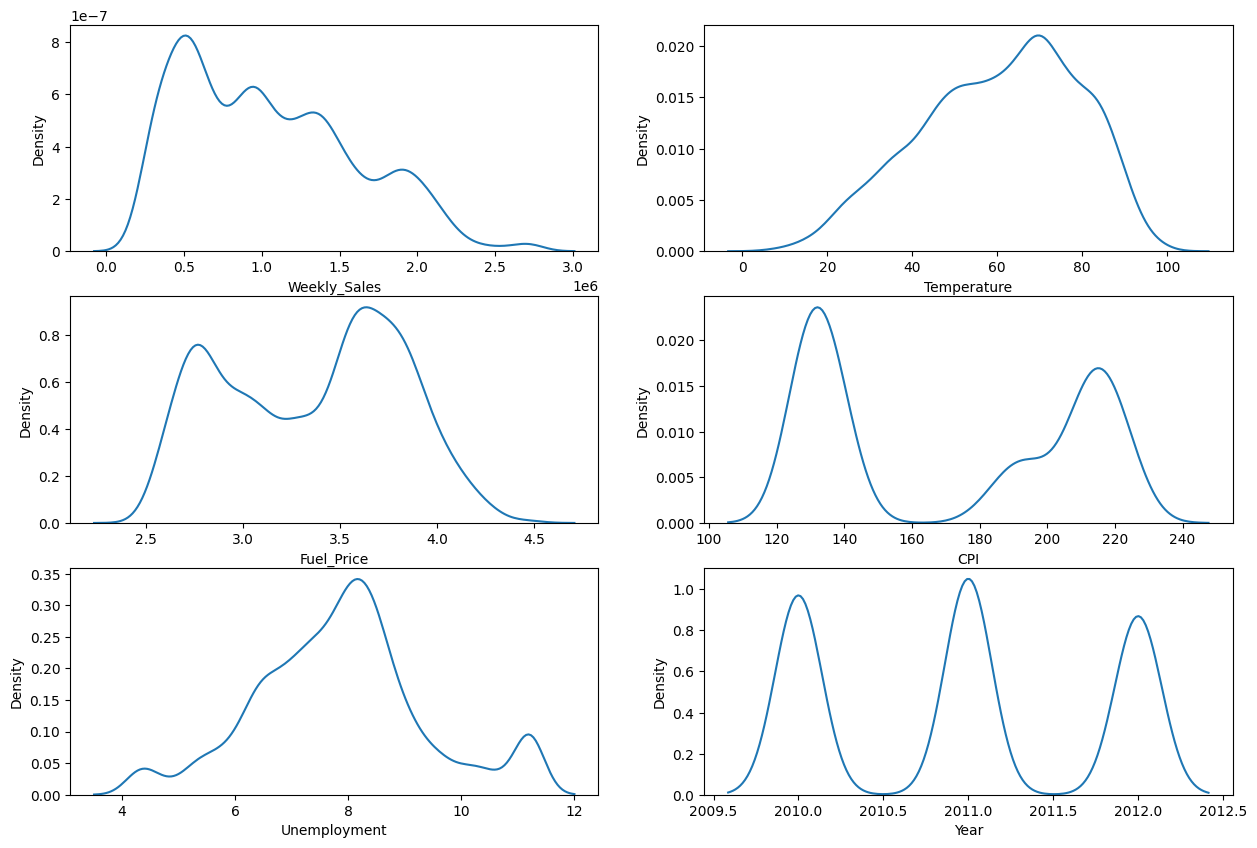

In [34]:
n = 1
plt.figure(figsize=(15,10))
for i in ['Weekly_Sales','Temperature', 'Fuel_Price','CPI', 'Unemployment','Year']:
        if n<=6:
            plt.subplot(3,2,n);
            n+=1
            sns.kdeplot(x = df2[i])
            plt.xlabel(i)

**Model Building**

In [35]:
x = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']

In [36]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [39]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    print(y_pred)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')
    

In [40]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x

[1255946.26117176 1097478.5533597  1286817.45343798 ...  693857.04050168
 1237561.40146736 1257854.27797935]
-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 264738381082.9739
MAE: 431432.7511108542
R2 : 15.25 %
[1255886.59084533 1097503.33531494 1286865.79159461 ...  693781.72977004
 1237523.83828396 1257778.73911637]
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 264737375720.92532
MAE: 431432.0331513191
R2 : 15.25 %
[1254917.64572868 1097928.71323236 1287510.032108   ...  692709.36786982
 1236973.37079346 1256633.36770273]
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 264721899729.84348
MAE: 431423.5915561213
R2 : 15.25 %
[1171432.66614788 1065631.0317677  1223969.95727302 ...  804226.45795187
 1160015.095687   1168016.10674916]
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 272154672488.92435


[None, None, None, None, None, None, None, None]

**RandomForestRegressor gives the best accuracy**

In [41]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [RandomForestRegressor]]
x

[1365613.7395 1389509.4645 1838770.6045 ...  762067.2674 1907258.7801
  805098.871 ]
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 14663290331.279884
MAE: 68194.76554611497
R2 : 95.31 %


[None]

In [42]:
def model(y_test, y_train, x_test, x_train, model):
    model1 = model()
    model1.fit(x_train, y_train)
    y_pred = model1.predict(x_test)
    
    print('Predicted values:')
    for value in y_pred:
        print(value)
x=model(y_test,y_train,x_test,x_train,RandomForestRegressor)
print(x)

Predicted values:
1327327.8565000005
1378138.2097999998
1823882.0472
953296.2226000009
427115.47390000016
972030.4067000005
1494190.3634999997
984922.5277000006
2017423.4592999995
1023036.7160000001
676766.3165000003
541595.2641000005
2115376.759175001
908884.7533000001
1042525.6996000006
934377.8156000014
665510.6933000004
858262.9971999995
548632.5317000002
551244.2819000005
757777.9899
418857.8321999997
1987269.2458
882788.8791000004
968956.8699999999
2034451.3658250005
2137985.141
2040341.0040500006
587324.2981000006
1599613.5783999995
974994.9286999997
1374175.0833999994
1752971.6726000009
1406722.0156000024
1434195.5814000003
687010.4652000006
2085413.1144
1936749.9295999992
2210631.288024998
1832432.9529000001
811178.3758999999
783657.1228000001
1127062.713299999
1272344.9206000008
1360929.1607000001
942146.0725000009
1615669.1933000016
500361.5988000008
1974882.0609750014
491902.7499999997
1891258.5792999999
1967829.2579999978
1675127.8051999984
1076940.7358
1851407.5515
424881

In [43]:
print(df.head())
print(df.tail())

   Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  Day  Week  Month  Year  
0         8.106    6    17      5  2010  
1         8.106    3    48     12  2010  
2         8.106    4     7      2  2010  
3         8.106    4     8      2  2010  
4         8.106    0    18      5  2010  
      Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
6430     45     713173.95             0        64.88       3.997  192.013558   
6431     45     733455.07             0        64.89       3.985  192.170412   
6432     45     734464.36             0      